# Examination of calibration sample using SDSS/LAMOST/APOGEE data xmatched with SMASH

In [35]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import fitsio
from fitsio import FITS,FITSHDR
from astropy import units as u
from astropy.coordinates import SkyCoord
from PIL import Image
from scipy import stats
import matplotlib.lines as mlines
import matplotlib.colors as clr

  


In [36]:
#upload photometric data
data = '/Users/amyel/research/SMASH_project/datafiles/smash_standards.fits'
fx = fitsio.FITS(data)
objs_SMASH = fx[1].read()
#create SkyCoord object
cSMASH = SkyCoord(objs_SMASH["RA"],objs_SMASH["DEC"],unit="deg")


In [37]:
#print total number of objects in data set
print('SMASH objects',len(objs_SMASH))

SMASH objects 64599


In [38]:
#upload SDSS spectroscopic data
data = '/Users/amyel/research/SMASH_project/datafiles/ssppOut-dr10.fits'
fx = fitsio.FITS(data)
objs_SDSS = fx[1].read()
#cut out declinations with values less than -90
good=(objs_SDSS["DEC"]>=-90)
objs_SDSS=objs_SDSS[good]
#creat SkyCoord object
cSDSS = SkyCoord(objs_SDSS["RA"],objs_SDSS["DEC"],unit="deg") 

In [39]:
#print total number of objects in data set
print('SDSS objects',(len(objs_SDSS)))

SDSS objects 1843193


In [40]:
#upload LAMOST data
data = '/Users/amyel/research/SMASH_project/datafiles/dr3_stellar.fits'
fx = fitsio.FITS(data)
objs_LAMOST = fx[1].read()
cLAMOST = SkyCoord(objs_LAMOST["ra"],objs_LAMOST["dec"],unit="deg")

In [41]:
feh_LAMOST = [format(i,'.12g') for i in objs_LAMOST['feh']]

In [42]:
print(feh_LAMOST)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [43]:
feh_LAMOST[0]

'-0.660000026226'

In [44]:
data = '/Users/amyel/research/SMASH_project/datafiles/dr3_stellar.fits'
fx = fitsio.FITS(data)


In [45]:
#print total number of objects in data set
print('LAMOST objects',(len(objs_LAMOST)))

LAMOST objects 3177995


In [46]:
#cross matching SDSS to SMASH
idSDSS,d2d,d3d = cSMASH.match_to_catalog_sky(cSDSS)
good=(d2d.arcsec < 1)

#cross matching LAMOST to SMASH
idLAMOST,d2d,d3d = cSMASH.match_to_catalog_sky(cLAMOST)
good2=(d2d.arcsec < 1)

In [47]:
feh_LAMOST = np.array(feh_LAMOST)

In [48]:
#matched SMASH with LAMOST
objs_SMASH_LAMOST = objs_SMASH[good2]
objs_LAMOST = objs_LAMOST[idLAMOST][good2]
feh_LAMOST = feh_LAMOST[idLAMOST][good2]

#matched SMASH with SDSS
objs_SMASH = objs_SMASH[good]
objs_SDSS = objs_SDSS[idSDSS][good]

In [49]:
selected = np.where(objs_SDSS["FEH_ADOP"]>-5)
objs_SDSS=objs_SDSS[selected]
objs_SMASH = objs_SMASH[selected]

In [50]:
selected=np.where((objs_SDSS["LOGG_ADOP"]>((-.0004701)*objs_SDSS["TEFF_ADOP"]+6.121)))
cut_SDSS=objs_SDSS[selected]
cut_SMASH=objs_SMASH[selected]
giants_SDSS = np.delete(objs_SDSS,selected)
giants_SMASH_SDSS = np.delete(objs_SMASH,selected)


In [51]:
#for straight line on plot
x_line = np.arange(3000,10000,.01)
y_line = (-.0004701)*x_line + 6.121

# Below, the original giant cuts I made to the SDSS/SMASH xmatches

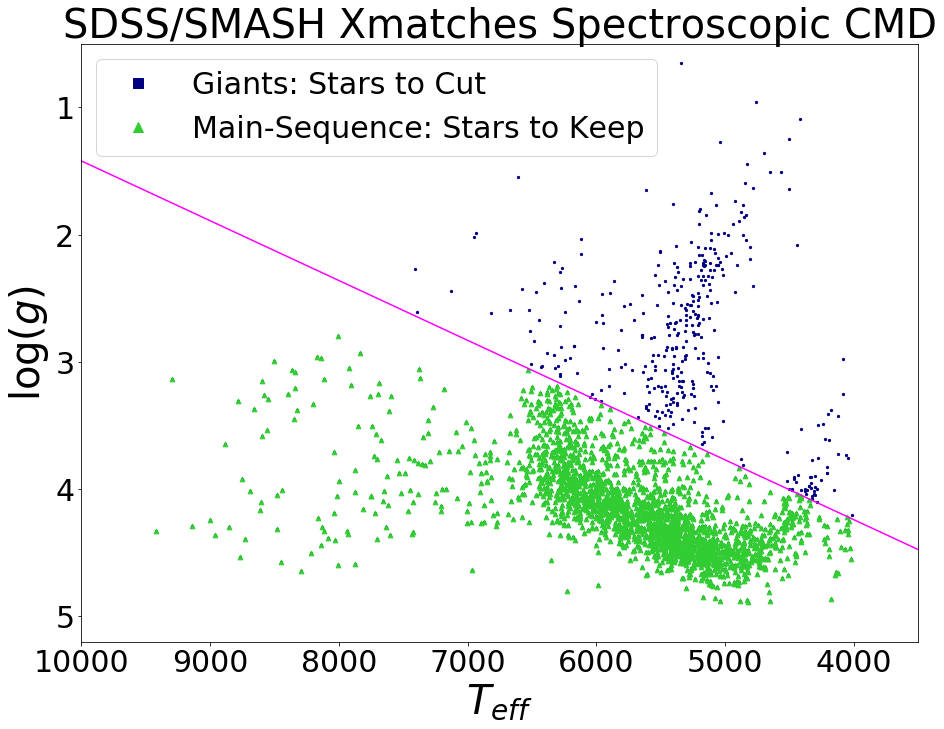

In [52]:
#plot log(g) vs. Teff for SDSS/SMASH
navy = mlines.Line2D([], [], color='navy', marker='s',linestyle='None',markersize=10, label='Giants: Stars to Cut')
green = mlines.Line2D([], [], color='limegreen', marker='^',linestyle='None',markersize=10, label='Main-Sequence: Stars to Keep')
magenta = mlines.Line2D([], [], color='magenta', markersize=10, label='$y=-.0004701x+6.121$')



fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(objs_SDSS["TEFF_ADOP"],objs_SDSS["LOGG_ADOP"],marker='o',color='navy',s=5)
ax.scatter(cut_SDSS["TEFF_ADOP"],cut_SDSS["LOGG_ADOP"],marker='^',color='limegreen',s=22)
ax.plot(x_line,y_line,c='magenta')
ax.set_xlabel('$T_{eff}$',fontsize=40)
ax.set_ylabel('log$(g)$',fontsize=40)
#ax.set_title('Spectroscopic HR Diagram: SMASH and SDSS',fontsize=40)

#red_patch = mpatches.Patch(color='red',label='Stars to Keep')
#blue_patch = mpatches.Patch(color='blue',label='Stars to Cut')
ax.legend(handles=[navy,green],fontsize=30)
ax.set_xlim(3500,10000)
ax.set_ylim(.5,5.2)
ax.set_title('SDSS/SMASH Xmatches Spectroscopic CMD',fontsize=40)
ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=30)



# Do I really need to cut all the "giants" from my calibration sample???

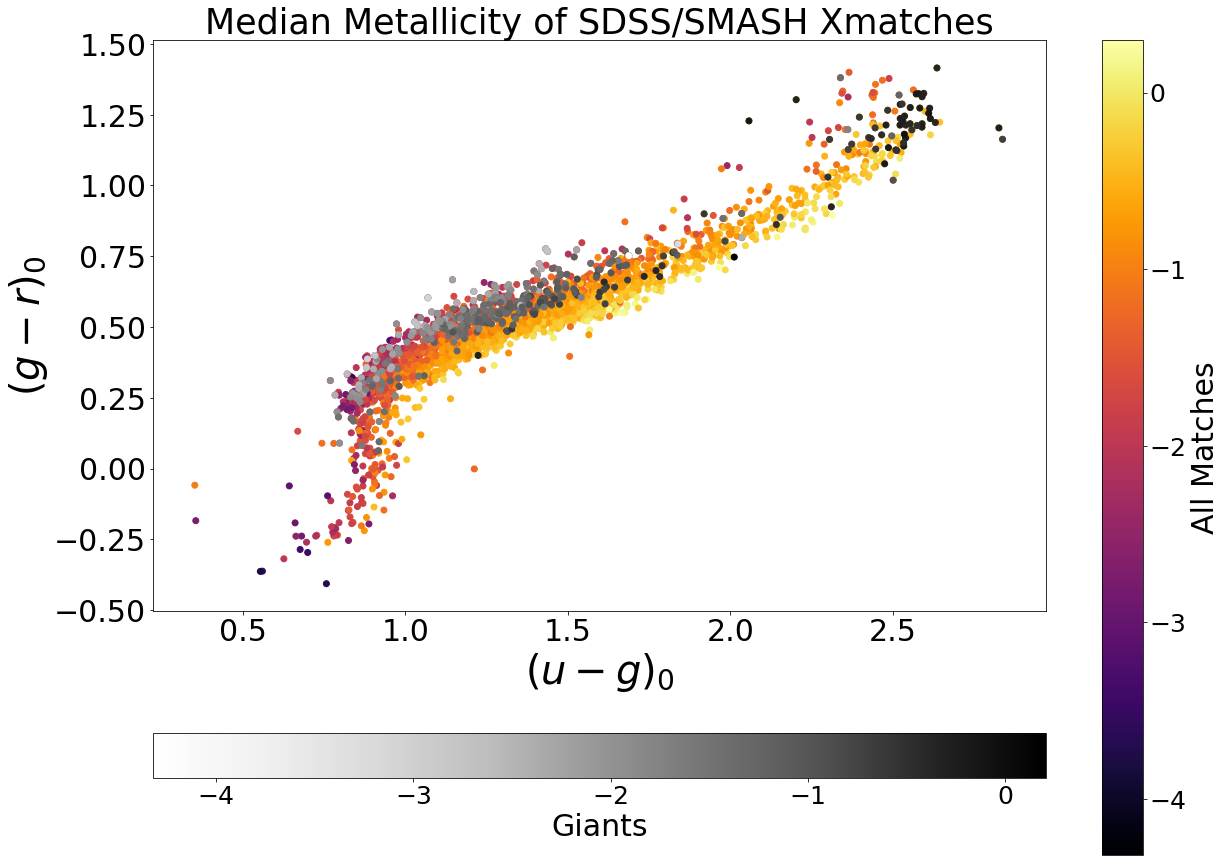

In [53]:
fig, ax = plt.subplots(figsize=(20,15))
im = plt.scatter((objs_SMASH["U"]-objs_SMASH['G']),(objs_SMASH["G"]-objs_SMASH['R']),c=objs_SDSS["FEH_ADOP"],cmap='inferno')
ax.set_title('Original Calibration Data',fontsize=15)
plt.xlabel('$(u-g)_0$',fontsize=40)
plt.ylabel('$(g-r)_0$',fontsize=40)
plt.title('Median Metallicity of SDSS/SMASH matches',fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=30)
cb=fig.colorbar(im,ax=ax)
ticklabs = cb.ax.get_yticklabels()
cb.ax.set_yticklabels(ticklabs, fontsize=25)
cb.set_label('All Matches',fontsize=30)

im2 = plt.scatter((giants_SMASH_SDSS["U"]-giants_SMASH_SDSS['G']),(giants_SMASH_SDSS["G"]-giants_SMASH_SDSS['R']),c=giants_SDSS["FEH_ADOP"],cmap='Greys')
ax.set_title('Original Calibration Data',fontsize=15)
ax.set_xlabel('$(u-g)_0$',fontsize=40)
ax.set_ylabel('$(g-r)_0$',fontsize=40)
ax.set_title('Median Metallicity of SDSS/SMASH Xmatches',fontsize=35)

ax.tick_params(axis='both', which='major', labelsize=30)
cb1=fig.colorbar(im2,ax=ax,orientation='horizontal')
ticklabs = cb1.ax.get_xticklabels()
cb1.ax.set_xticklabels(ticklabs,fontsize=25)
cb1.set_label('Giants',fontsize = 30)





# As you can see above, the "giants" I cut originally lie in the region of color space in which the SMASH:
## Region of color space of SMASH MSTO stars, roughly: 0.3<=(u-g)<=1.5 and 0 <= (g-r) <= 0.5

In [54]:
#for straight line on plot
x_line = np.arange(3000,10000,.01)
y_line = (-.0004213)*x_line + 6.2685

In [55]:
#making cuts
selected=np.where((objs_LAMOST["logg"]>((-.0004213)*objs_LAMOST["teff"]+6.2685)))
cut_LAMOST=objs_LAMOST[selected]
feh_LAMOST_giants = np.delete(feh_LAMOST,selected)
feh_LAMOST_cut = feh_LAMOST[selected]
cut_SMASH_LAMOST=objs_SMASH_LAMOST[selected]
giants_LAMOST = np.delete(objs_LAMOST,selected)
giants_SMASH_LAMOST = np.delete(objs_SMASH_LAMOST,selected)


In [58]:
feh_LAMOST_giants = np.delete(feh_LAMOST,selected)

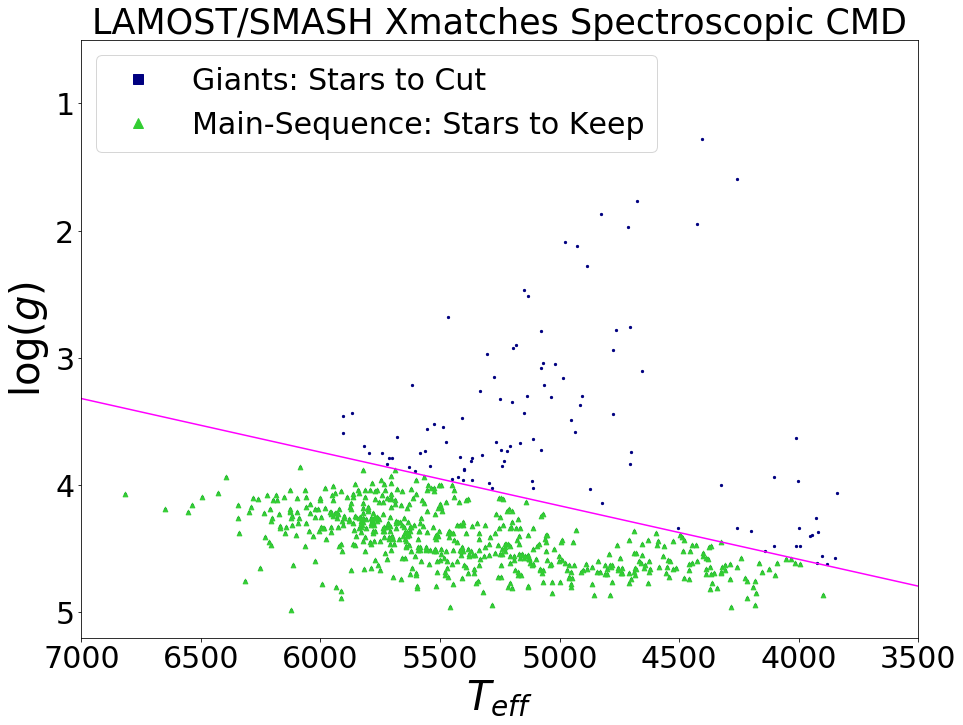

In [65]:
#plot logg vs. teff for LAMOST/SMASH
navy = mlines.Line2D([], [], color='navy', marker='s',linestyle='None',markersize=10, label='Giants: Stars to Cut')
green = mlines.Line2D([], [], color='limegreen', marker='^',linestyle='None',markersize=10, label='Main-Sequence: Stars to Keep')
magenta = mlines.Line2D([], [], color='magenta', markersize=10, label='$y=-.0004213x+6.2685$')

fig, ax = plt.subplots(figsize=(15,11))
plt.scatter(objs_LAMOST["teff"],objs_LAMOST["logg"],marker='o',color='navy',s=5)
plt.scatter(cut_LAMOST["teff"],cut_LAMOST["logg"],marker='^',color='limegreen',s=22)
ax.plot(x_line,y_line,c='magenta')

plt.xlabel('$T_{eff}$',fontsize=40)
plt.ylabel('log$(g)$',fontsize=40)
#plt.title('Spectroscopic HR Diagram: SMASH and LAMOST',fontsize=40)

#red_patch = mpatches.Patch(color='red',label='Data Points to Keep')
#blue_patch = mpatches.Patch(color='blue',label='Data Points to Cut')
ax.set_title('LAMOST/SMASH Xmatches Spectroscopic CMD',fontsize=35)

ax.legend(handles=[navy,green],fontsize=30)
ax.set_xlim(3500,7000)
ax.set_ylim(.5,5.2)
ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=30)

In [62]:
print(feh_LAMOST_giants)

['-0.439999997616' '-0.129999995232' '0.019999999553' '-0.189999997616'
 '-0.52999997139' '-0.610000014305' '-0.449999988079' '-0.479999989271'
 '-0.370000004768' '-0.289999991655' '-1.24000000954' '-2.18000006676'
 '-0.660000026226' '-1.66999995708' '-0.379999995232' '-1.20000004768'
 '-0.019999999553' '-1.58000004292' '-0.600000023842' '-1.00999999046'
 '-0.629999995232' '-1.62000000477' '-1.87999999523' '-1.20000004768'
 '-0.300000011921' '-1.85000002384' '-1.23000001907' '0'
 '-0.0500000007451' '-0.170000001788' '-0.379999995232' '-0.819999992847'
 '-0.629999995232' '-0.689999997616' '-1.72000002861' '-0.870000004768'
 '-1.49000000954' '-0.310000002384' '-0.430000007153' '-1.01999998093'
 '-0.639999985695' '-0.870000004768' '-0.810000002384' '-0.300000011921'
 '-1.63999998569' '-1.00999999046' '-1.76999998093' '-0.72000002861'
 '-0.899999976158' '-1.01999998093' '-0.980000019073' '-0.189999997616'
 '-0.15000000596' '-1.23000001907' '-0.910000026226' '-1.04999995232'
 '-0.5400000214

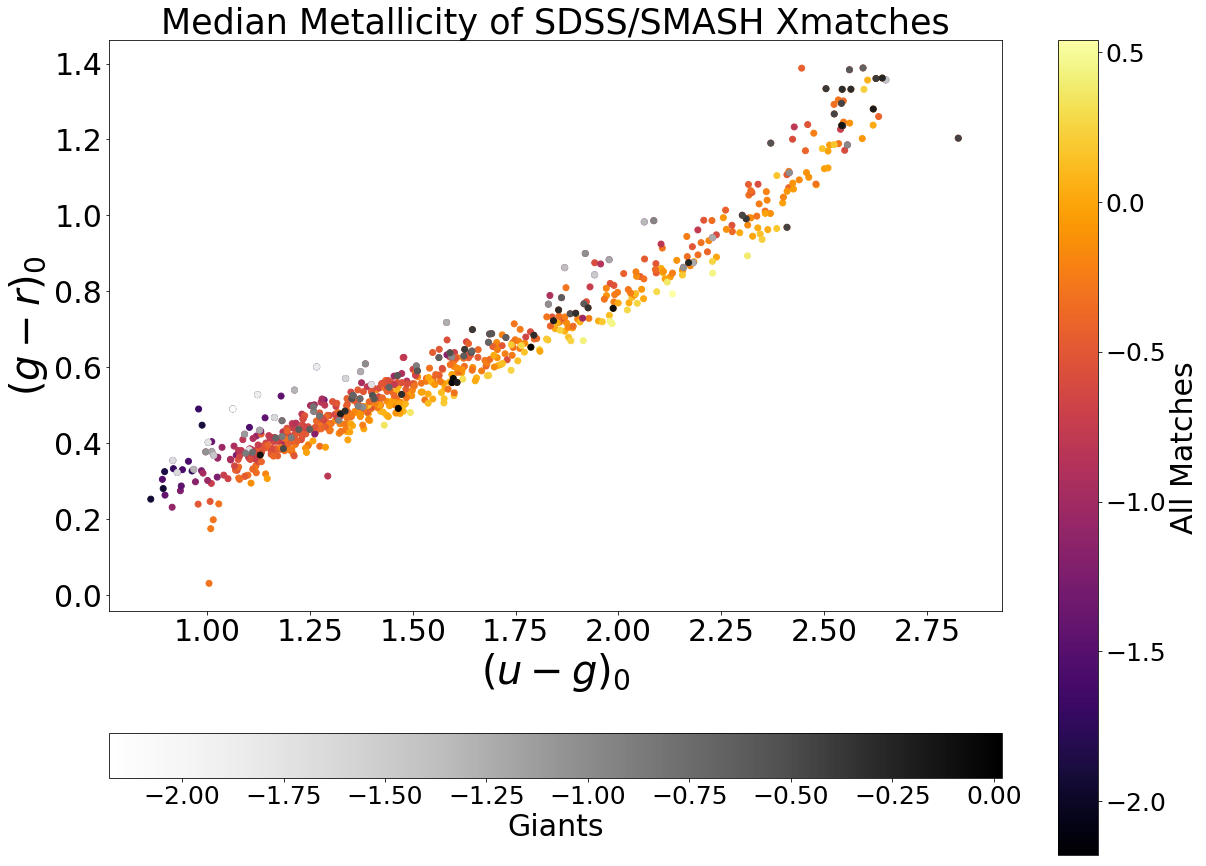

In [63]:
fig, ax = plt.subplots(figsize=(20,15))
im = plt.scatter((objs_SMASH_LAMOST["U"]-objs_SMASH_LAMOST['G']),(objs_SMASH_LAMOST["G"]-objs_SMASH_LAMOST['R']),c=feh_LAMOST,cmap='inferno')
ax.set_title('Original Calibration Data',fontsize=15)
plt.xlabel('$(u-g)_0$',fontsize=40)
plt.ylabel('$(g-r)_0$',fontsize=40)
plt.title('Median Metallicity of LAMOST/SMASH matches',fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=30)
cb=fig.colorbar(im,ax=ax)
ticklabs = cb.ax.get_yticklabels()
cb.ax.set_yticklabels(ticklabs, fontsize=25)
cb.set_label('All Matches',fontsize=30)

im2 = plt.scatter((giants_SMASH_LAMOST["U"]-giants_SMASH_LAMOST['G']),(giants_SMASH_LAMOST["G"]-giants_SMASH_LAMOST['R']),c=feh_LAMOST_giants,cmap='Greys')
ax.set_title('Original Calibration Data',fontsize=15)
ax.set_xlabel('$(u-g)_0$',fontsize=40)
ax.set_ylabel('$(g-r)_0$',fontsize=40)
ax.set_title('Median Metallicity of SDSS/SMASH Xmatches',fontsize=35)

ax.tick_params(axis='both', which='major', labelsize=30)
cb1=fig.colorbar(im2,ax=ax,orientation='horizontal')
ticklabs = cb1.ax.get_xticklabels()
cb1.ax.set_xticklabels(ticklabs,fontsize=25)
cb1.set_label('Giants',fontsize = 30)





# Again, some of the "giants" I cut lie in the region of color space I am interested in 

# Now, look at the apogee/smash xmatches 

In [64]:
#now, upload the corssmatches from apogee and smash
data = '/Users/amyel/research/SMASH_project/datafiles/apogee_smash_xmatch.fits'
fx = fitsio.FITS(data)
objs_apogee = fx[1].read()

In [67]:
print('total apogee matches',len(objs_apogee))

total apogee matches 1814


In [97]:
selected = np.where((objs_apogee["LOGG"]>-10) & (objs_apogee["TEFF"] > 0) & (objs_apogee["FE_H"]>-10) & (objs_apogee["U"]>-10) &(objs_apogee["U"]<30) &(objs_apogee["G"]>-10) &(objs_apogee["G"]<30) &(objs_apogee["R"]>-10) &(objs_apogee["R"]<30))
objs_apogee = objs_apogee[selected]

In [98]:
selected=np.where((objs_apogee["LOGG"]>((-.0004213)*objs_apogee["TEFF"]+5.2685)))
cut_apogee = objs_apogee[selected]
giants_apogee = np.delete(objs_apogee,selected)



In [99]:
#for straight line on plot
x_line = np.arange(3000,10000,.01)
y_line = (-.0004213)*x_line + 5.2685

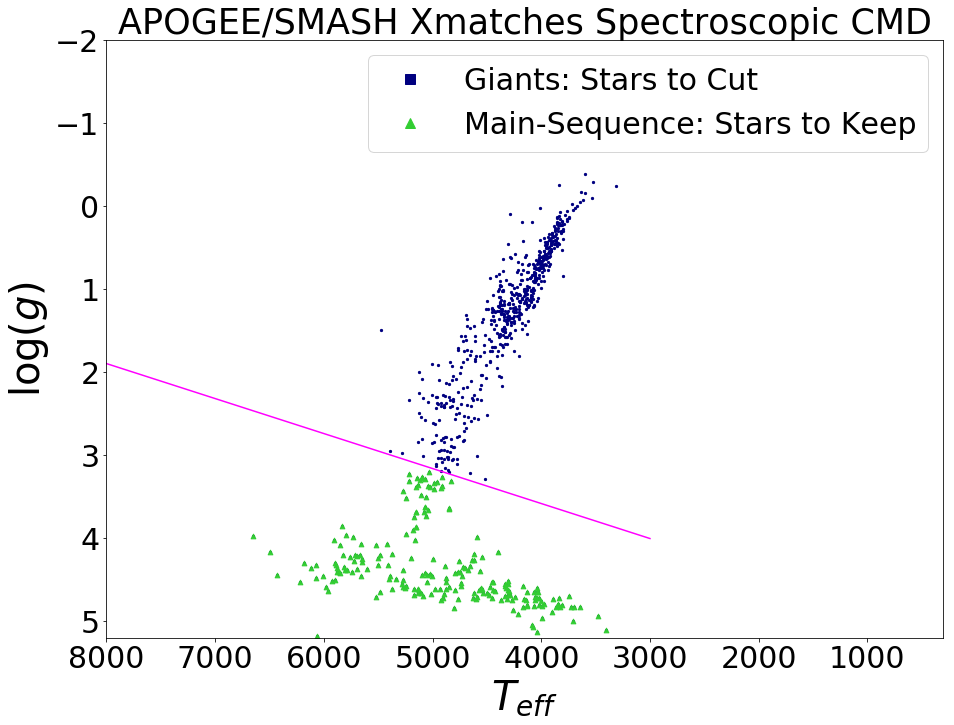

In [100]:
#plot log(g) vs. Teff for SDSS/SMASH
navy = mlines.Line2D([], [], color='navy', marker='s',linestyle='None',markersize=10, label='Giants: Stars to Cut')
green = mlines.Line2D([], [], color='limegreen', marker='^',linestyle='None',markersize=10, label='Main-Sequence: Stars to Keep')
magenta = mlines.Line2D([], [], color='magenta', markersize=10, label='$y=-.0004701x+6.121$')



fig, ax = plt.subplots(figsize=(15,11))
ax.scatter(objs_apogee["TEFF"],objs_apogee["LOGG"],marker='o',color='navy',s=5)
ax.scatter(cut_apogee["TEFF"],cut_apogee["LOGG"],marker='^',color='limegreen',s=22)
ax.plot(x_line,y_line,c='magenta')
ax.set_xlabel('$T_{eff}$',fontsize=40)
ax.set_ylabel('log$(g)$',fontsize=40)
#ax.set_title('Spectroscopic HR Diagram: SMASH and SDSS',fontsize=40)

#red_patch = mpatches.Patch(color='red',label='Stars to Keep')
#blue_patch = mpatches.Patch(color='blue',label='Stars to Cut')
ax.legend(handles=[navy,green],fontsize=30)
ax.set_xlim(300,8000)
ax.set_ylim(-2,5.2)
ax.set_title('APOGEE/SMASH Xmatches Spectroscopic CMD',fontsize=35)
ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
ax.tick_params(axis='both', which='major', labelsize=30)



In [101]:
print('number of main sequence smash/apogee matches',len(cut_apogee))

number of main sequence smash/apogee matches 216


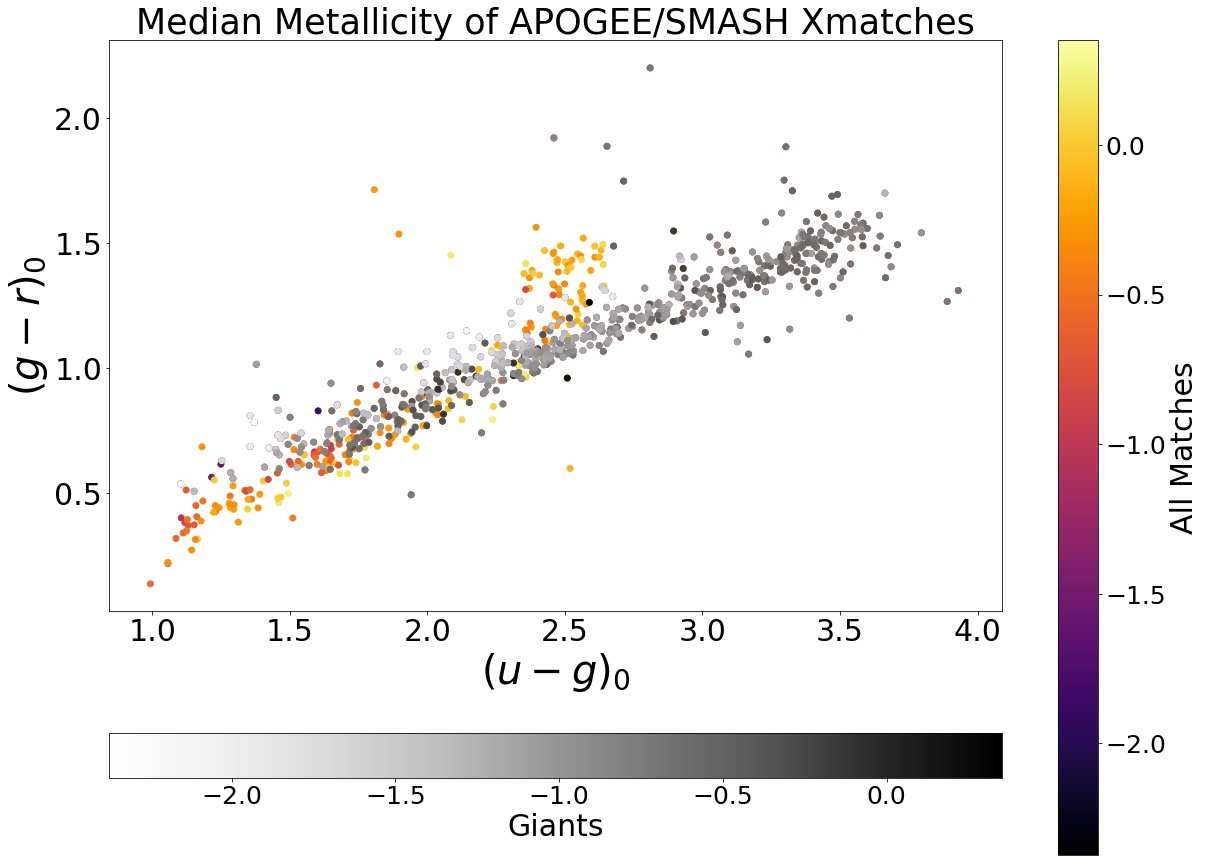

In [102]:
fig, ax = plt.subplots(figsize=(20,15))
im = plt.scatter((objs_apogee["U"]-objs_apogee['G']),(objs_apogee["G"]-objs_apogee['R']),c=objs_apogee["FE_H"],cmap='inferno')
ax.set_title('Original Calibration Data',fontsize=15)
plt.xlabel('$(u-g)_0$',fontsize=40)
plt.ylabel('$(g-r)_0$',fontsize=40)
plt.title('Median Metallicity of APOGEE/SMASH matches',fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=30)
cb=fig.colorbar(im,ax=ax)
ticklabs = cb.ax.get_yticklabels()
cb.ax.set_yticklabels(ticklabs, fontsize=25)
cb.set_label('All Matches',fontsize=30)

im2 = plt.scatter((giants_apogee["U"]-giants_apogee['G']),(giants_apogee["G"]-giants_apogee['R']),c=giants_apogee["FE_H"],cmap='Greys')
ax.set_title('Original Calibration Data',fontsize=15)
ax.set_xlabel('$(u-g)_0$',fontsize=40)
ax.set_ylabel('$(g-r)_0$',fontsize=40)
ax.set_title('Median Metallicity of APOGEE/SMASH Xmatches',fontsize=35)

ax.tick_params(axis='both', which='major', labelsize=30)
cb1=fig.colorbar(im2,ax=ax,orientation='horizontal')
ticklabs = cb1.ax.get_xticklabels()
cb1.ax.set_xticklabels(ticklabs,fontsize=25)
cb1.set_label('Giants',fontsize = 30)


# AGAIN
# As you can see above, the "giants" I cut originally lie in the region of color space in which the SMASH:
## Region of color space of SMASH MSTO stars, roughly: 0.3<=(u-g)<=1.5 and 0 <= (g-r) <= 0.5

# NOW, I will make compare the original calibration median metallicity map to a new one with APOGEE data and the giants not cut out

In [103]:
data = '/Users/amyel/research/SMASH_project/datafiles/new_SMASH_SDSS_LAMOST_crossmatch.fits'
fx = fitsio.FITS(data)
objs = fx[1].read()

In [105]:
#deredden calibration sample
u_cal = (objs["U"]-(4.239*objs["EBV"]))
g_cal = (objs["G"]-(3.303*objs["EBV"]))
i_cal = (objs["I"]-(1.263*objs["EBV"]))
r_cal = (objs["R"]-(2.285*objs["EBV"]))
feh_cal = objs["FEH"]
u_g_cal = u_cal - g_cal
g_r_cal = g_cal - r_cal

In [106]:
ret,xedge,yedge,bin = stats.binned_statistic_2d((u_g_cal),(g_r_cal),feh_cal,'median',50)


/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


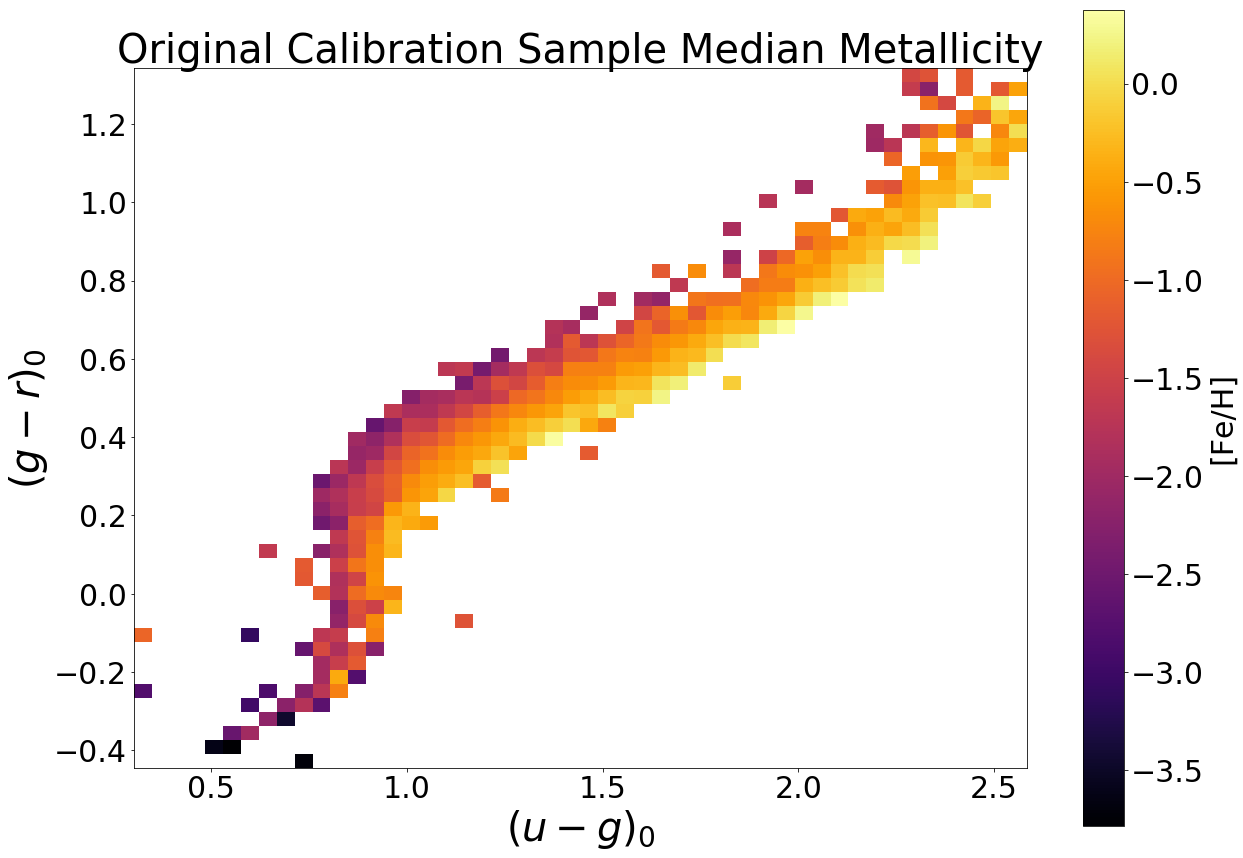

In [109]:

fig, ax = plt.subplots(figsize=(20,15))
im = ax.imshow(ret.T,origin='lower',extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],cmap='inferno')
ax.set_title('Original Calibration Data',fontsize=15)
ax.set_xlabel('$(u-g)_0$',fontsize=40)
ax.set_ylabel('$(g-r)_0$',fontsize=40)
ax.set_title('Original Calibration Sample Median Metallicity',fontsize=40)

ax.tick_params(axis='both', which='major', labelsize=30)
cb=fig.colorbar(im,ax=ax)
ticklabs = cb.ax.get_yticklabels()
cb.ax.set_yticklabels(ticklabs, fontsize=30)
cb.set_label('[Fe/H]',fontsize=30)



In [127]:
print('stars in original calibration sample',len(feh_cal))

points in original calibration sample 2770


In [122]:
#deredden calibration sample
u_new =np.append(u_cal,(objs_apogee["U"]-(4.239*objs_apogee["EBV"])))
g_new =np.append(g_cal,(objs_apogee["G"]-(3.303*objs_apogee["EBV"]))) 
i_new =np.append(i_cal,(objs_apogee["I"]-(1.263*objs_apogee["EBV"]))) 
r_new =np.append(r_cal,(objs_apogee["R"]-(2.285*objs_apogee["EBV"]))) 
feh_new = np.append(feh_cal,objs_apogee["FE_H"])
u_g_new = u_new - g_new
g_r_new = g_new - r_new

In [125]:
ret,xedge,yedge,bin = stats.binned_statistic_2d((u_g_new),(g_r_new),feh_new,'median',50)


/Users/amyel/anaconda3/lib/python3.7/site-packages/scipy/stats/_binned_statistic.py:607: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


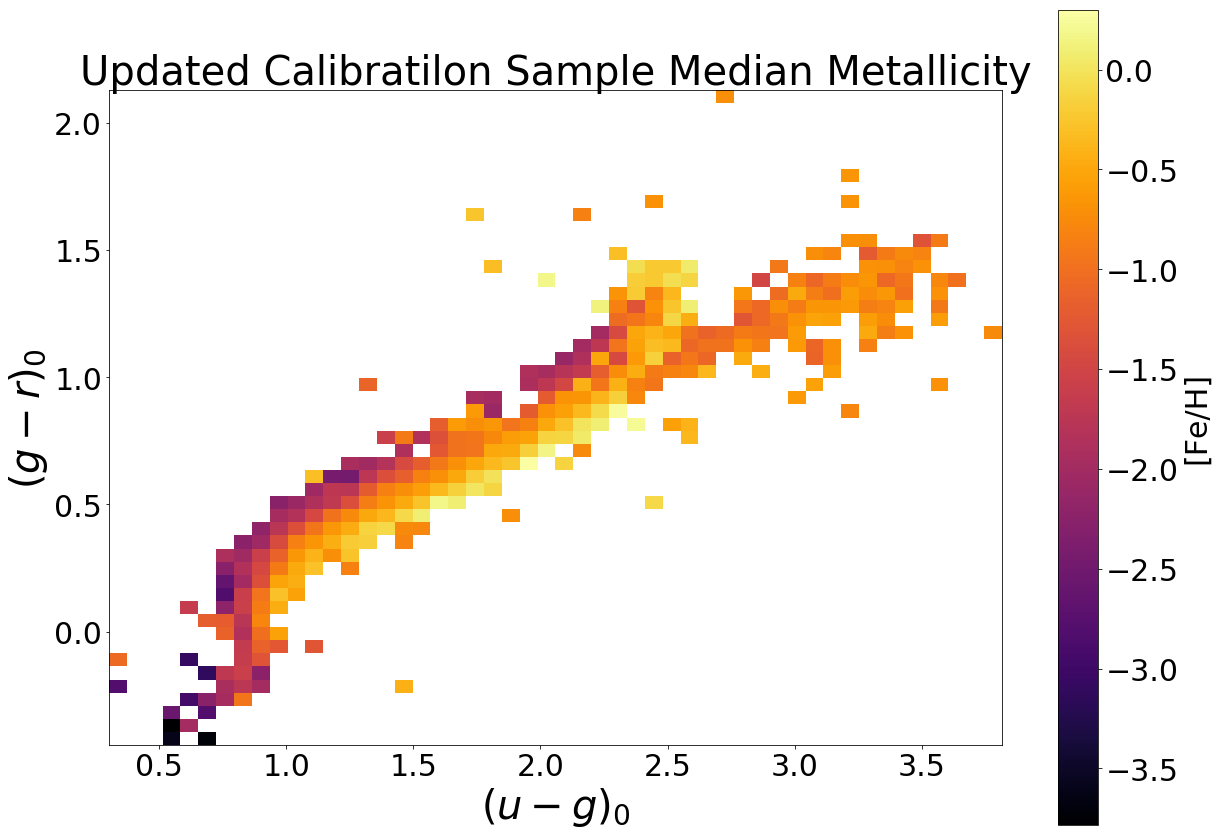

In [126]:
fig, ax = plt.subplots(figsize=(20,15))
im = ax.imshow(ret.T,origin='lower',extent=[xedge.min(),xedge.max(),yedge.min(),yedge.max()],cmap='inferno')
ax.set_title('Original Calibration Data',fontsize=15)
ax.set_xlabel('$(u-g)_0$',fontsize=40)
ax.set_ylabel('$(g-r)_0$',fontsize=40)
ax.set_title('Updated Calibratilon Sample Median Metallicity',fontsize=40)

ax.tick_params(axis='both', which='major', labelsize=30)
cb=fig.colorbar(im,ax=ax)
ticklabs = cb.ax.get_yticklabels()
cb.ax.set_yticklabels(ticklabs, fontsize=30)
cb.set_label('[Fe/H]',fontsize=30)



In [128]:
print('stars in updated calibration sample',len(feh_new))

stars in updated calibration sample 3569
